# Mini Project 5 - Exploration Data Analysis and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a data set. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your data set:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

The dataset we will use in this mini project comes from Duolingo, which is the world's most popular platform to learn a language. You can download and check the 13 million Duolingo student learning traces from the website: <br/>
https://github.com/duolingo/halflife-regression

### General Philosophy and Steps for this mini project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

## Duolingo Exploratory Data Analysis

In [2]:
# Import all dependencies we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [3]:
# avaliable plot styles
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### Import data

In [5]:
# Since this dataset is 1.3G and we only take a look of first 1000000 rows #
df = pd.read_csv('learning_traces.csv', nrows=1000000)

In [6]:
# Print out the head of our dataset
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
# Check the infomation of our data, such as columns, data type #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [7]:
# Dimension of dataset #
df.shape

(1000000, 12)

#### Please try to answer the following questions when you follow the data visualization procedures below:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features  

### Numerical data

In [8]:
# list all types that only take numerical ones
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

#### 1. Create a dataframe that only takes numerical data and show the head

In [9]:
# hint: df.select_dtypes() which you could select numerical data types
#con_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)
con = df.select_dtypes(exclude=['O'])

In [10]:
con.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


#### 2. Draw histgrams to show the distributions of all the numerical data from the dataframe we just created.

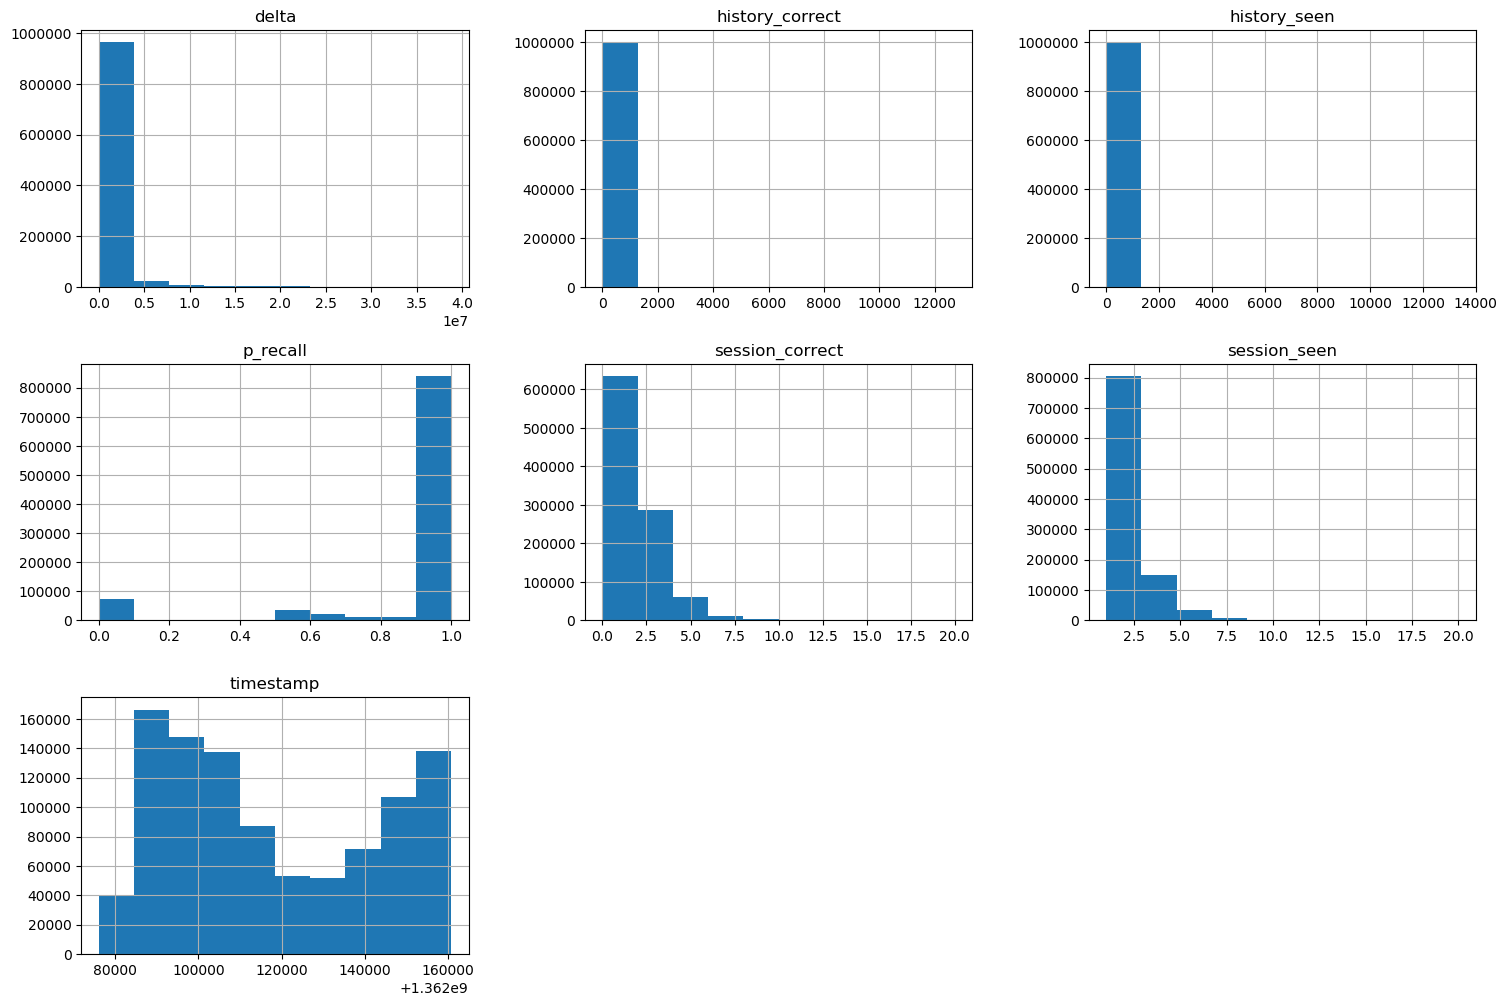

In [17]:
plt.style.use('default')
con.hist(figsize=(18,12))
plt.show()

### Feature to feature relationship

Trying to plot all the numerical features in a pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

#### 3. Compute pairwise correlation matrix of numerical columns and draw a heatmap using seaborn plot

hint: the heatmap may look like this
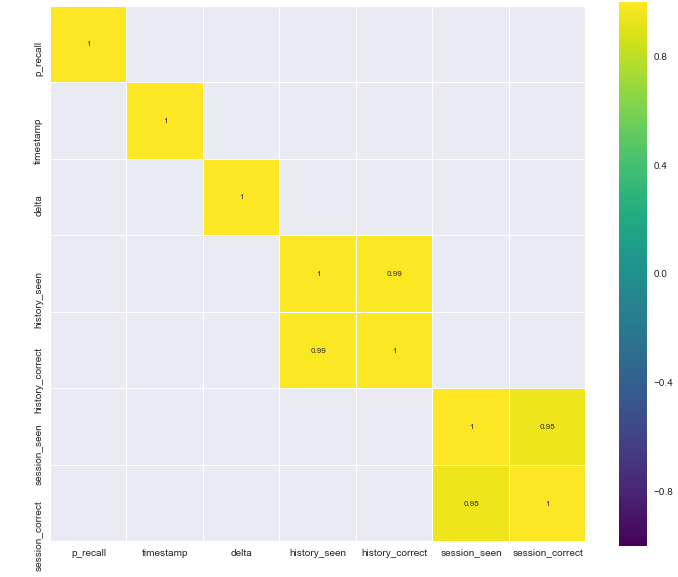

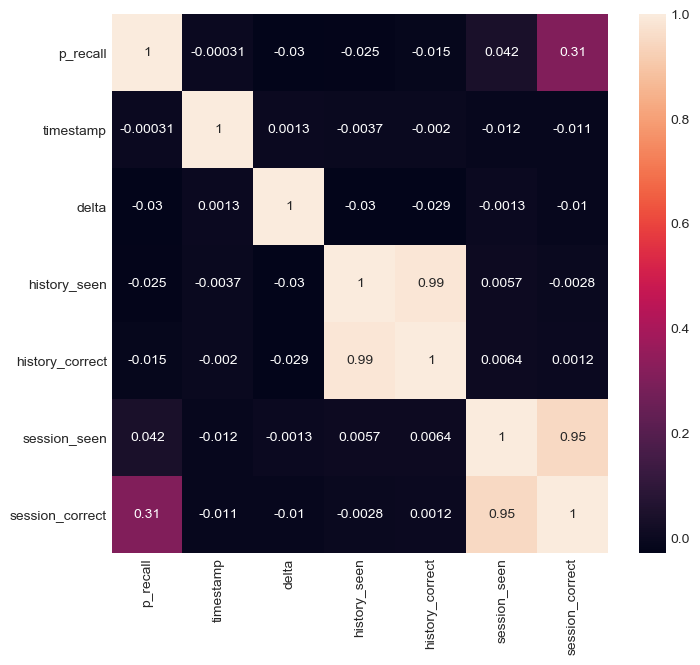

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,7))
sns.heatmap(data=con.corr(),annot=True)#,cmap="Blues")
plt.show()

### Categorical data - Countries

#### 1. What are user interface languages? 

In [28]:
df.learning_language.value_counts()

en    401877
es    259818
fr    148692
de    112709
it     54147
pt     22757
Name: learning_language, dtype: int64

#### 2. Do a value_counts() to see how popular each interface language is

In [37]:
df.ui_language.value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

#### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

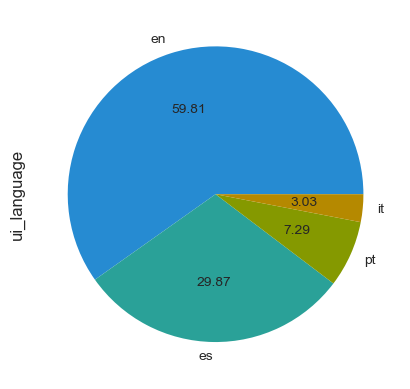

In [40]:
# hint: showing percentage, add autopct parameter
ui_language =df.ui_language.value_counts()/len(df.ui_language)
ui_language.plot.pie(autopct='%.2f')

#### 4. Draw a pie plot of languages that individuals are learnging

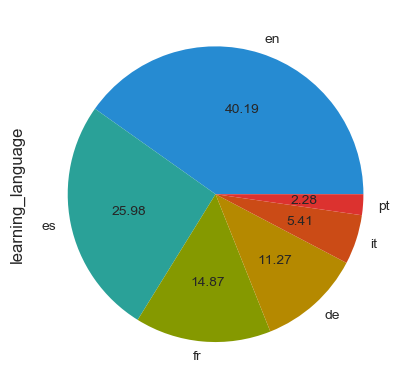

In [44]:
# Type you answer below 
(df.learning_language.value_counts()/len(df.learning_language)).plot.pie(autopct='%.2f')
plt.show()

#### 5. Pie plot to visualize what languages being learned by people whose interface language is English

In [50]:
# you want to show the learning language based on people whose interface language is English
# Type you answer below 
df.loc[df.learning_language=='en']

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,1.000000,1362082504,357,u:dwbJ,en,pt,1052c3ace653dbc8923eaa183bc02b88,definition/definition<n><sg>,17,17,2,2
88,1.000000,1362082504,357,u:dwbJ,en,pt,9cba1b30f88bf3c047b22cffcaf88c12,surface/surface<n><sg>,19,19,3,3
89,1.000000,1362082504,357,u:dwbJ,en,pt,961cd149f20f2571419b1412d849f19a,scale/scale<n><sg>,21,20,3,3
90,0.800000,1362082504,357,u:dwbJ,en,pt,5cbb1249562e95794a4c4ae0e2d8ae26,temperature/temperature<n><sg>,44,36,5,4
91,1.000000,1362082504,357,u:dwbJ,en,pt,2df65bdf80d10d2b78d62cb2e0a731d8,distance/distance<n><sg>,21,20,3,3
92,1.000000,1362082504,357,u:dwbJ,en,pt,97ed837d0ec43fc8fbbb00c6897342c6,publication/publication<n><sg>,19,18,2,2
93,1.000000,1362082504,357,u:dwbJ,en,pt,525be716d73f73f66a7c4832478bbb9d,theory/theory<n><sg>,16,15,2,2
128,1.000000,1362082519,3888560,u:fsOi,en,es,e12e176302bb7055e90f0b421e1e5f92,thank/thank<vblex><pres>,5,5,4,4
136,1.000000,1362082525,610672,u:hX-p,en,it,390ca9c2868c14c5616c460e4f31762c,women/woman<n><pl>,36,36,3,3
137,1.000000,1362082525,271,u:hX-p,en,it,b968b069e4e2c04848e9f8924e34c031,we/prpers<prn><subj><p1><mf><pl>,76,67,4,4


#### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

In [ ]:
# Type you answer below 


#### hint: result plot would look like this
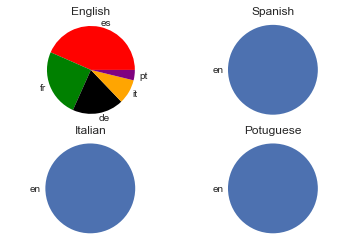

## Users Activity patterns

#### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [10]:
# hint: summary statistics use describe() function 
# Type you answer below 


#### 2. Compute the duration of dataset

In [ ]:
# hint: maximum timestamp minus minimum timestamp
# Type you answer below 


## Boxplots

#### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

In [ ]:
# hint: df[df.ui_language == 'en']['user_id'].value_counts()/duration
# Type you answer below 


#### 4. Do the same thing but setting ylim to 0-10, which plot would be seen more clearly

In [ ]:
# Type you answer below 


####  5. Another way to zoom in instead of setting ylim is to take a log scale on the boxplot

In [ ]:
# hint: log scale on y
# Type you answer below 


## Regression and predictive tasks

In [11]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 1. Scatter plot the relation between session_seen and p_recall

In [ ]:
# Type you answer below 


#### 2. Scatter plot the same distribution with log scale. 

In [ ]:
# Type you answer below 


#### 3. Goupby session_seen and take aveage on it as x, and scatter plot relation with p_recall as y

In [ ]:
# hint: use groupby(), and mean() functions
# Type you answer below 


#### 4. Goupby history_seen and take aveage on it as x, and scatter plot relation with p_recall as y

In [ ]:
# Type you answer below 


#### 5. Scatter plot the relation history_seen and p_recall when session_seen is greater than 5

In [ ]:
# Type you answer below 


#### 6. Hexbin plot the relation between history_seen and p_recal with log scale

In [ ]:
# hint: hexbin()
# Type you answer below 


#### 7. Create a dataframe with user_id and user_activity based on user_id index

In [ ]:
# create an empty dataframe and set index to user_id
# Type you answer below 


#### 8. Merge dataframe a onto original dataframe

In [ ]:
# hint: merge(), pay attention to how to merge(inner, outer....)
# Type you answer below 


#### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

In [ ]:
# Type you answer below 


#### 10. Hexbin plot the relation between delta and p_recall with log scale

In [ ]:
# Type you answer below 


#### hint: hexbin plot would look like this 
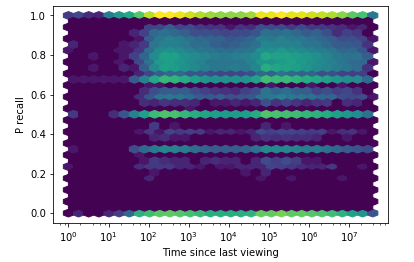

#### 11. Scatter plot relation between user_activity and delta

In [ ]:
# Type you answer below 


#### 12. Hexbin plot the relation between user_activity and delta with log scale

In [ ]:
# Type you answer below 


## Temporal patterns and Time Series

#### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [ ]:
# Type you answer below 


In [ ]:
# You can use datetime library to convert timestamp to actual datetime
dt.datetime.fromtimestamp(df.timestamp.min())

#### 2. Visualize each interface language users daily activity pattern onto a single plot. 

In [12]:
# hint: use rolling window here
# Type you answer below 


#### hint: result plot would look like this
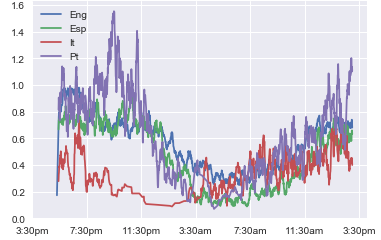